In [1]:
import pandas as pd           # Importing Necessary Modules

infl_df = pd.read_csv(r"E:\GUVI- Data Science\Final Porj\Influencer.csv")

In [3]:
infl_df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [91]:
# Data cleaning
# Same step is done for the columns 'Followers','Avg. likes', 'Posts', 'New Post Avg. Likes' also.

Fol = infl_df['Total Likes']                           
Fol_li = []
for i in range(len(Fol)):
    if Fol[i].isnumeric() == False:
        if Fol[i][-1:] == 'k':
            Fol_li.append(float(Fol[i][:-1])*1000)
        if Fol[i][-1:] =='m':
            Fol_li.append(float(Fol[i][:-1])*1000000)
        if Fol[i][-1:] =='b':
            Fol_li.append(float(Fol[i][:-1])*1000000000)
    else:
        Fol_li.append(float(Fol[i]))

In [93]:
infl_df['Total Likes'] = Fol_li

In [94]:
# Cleaned Data.

infl_df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [ ]:
1. Are there any correlated features in the given dataset? If yes, state the correlation
coefficient of the pair of features which are highly correlated.

In [95]:
correlation = infl_df.corr(method='pearson')    # Finding the correlation between different variables in the data.

In [96]:
correlation

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.667546
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361296
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.232038
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,-0.001560
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.351335
Total Likes,-0.465119,0.234987,0.667546,0.361296,0.232038,-0.001560,0.351335,1.000000


<AxesSubplot:>

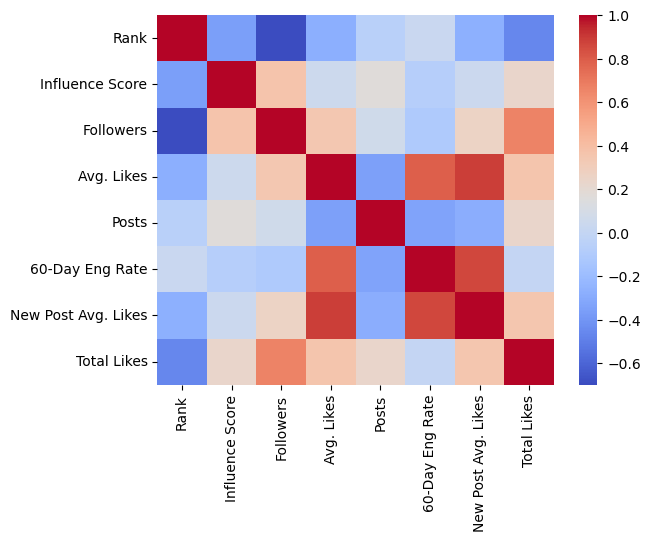

In [98]:
import seaborn as sns            # Showcasing the correlation data using heatmap inorder to understand which columns have highest correlation.

sns.heatmap(correlation, cmap='coolwarm')

In [ ]:
2. What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

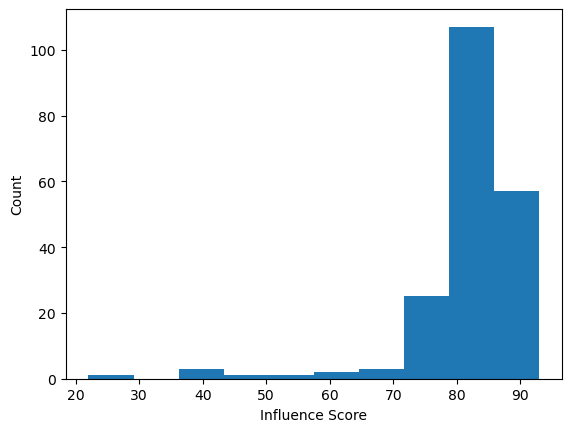

In [16]:
import matplotlib.pyplot as plt                 # Frequency distribution using matplot library.

plt.hist(infl_df['Influence Score'])
plt.xlabel('Influence Score')
plt.ylabel('Count')
plt.show()

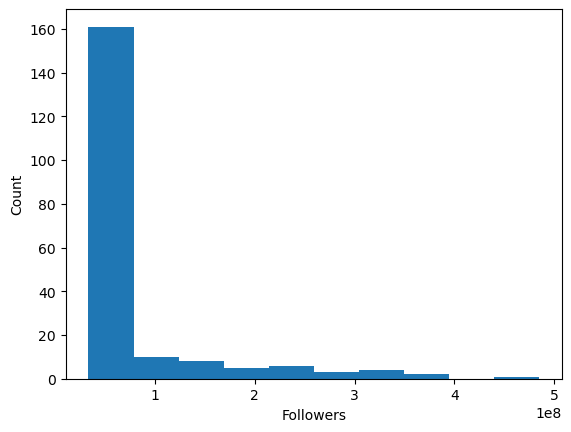

In [99]:
plt.hist(infl_df['Followers'])
plt.xlabel('Followers')
plt.ylabel('Count')
plt.show()

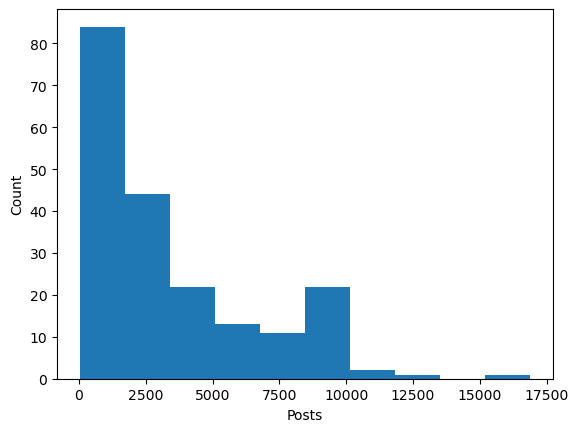

In [100]:
plt.hist(infl_df['Posts'])
plt.xlabel('Posts')
plt.ylabel('Count')
plt.show()

# 3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

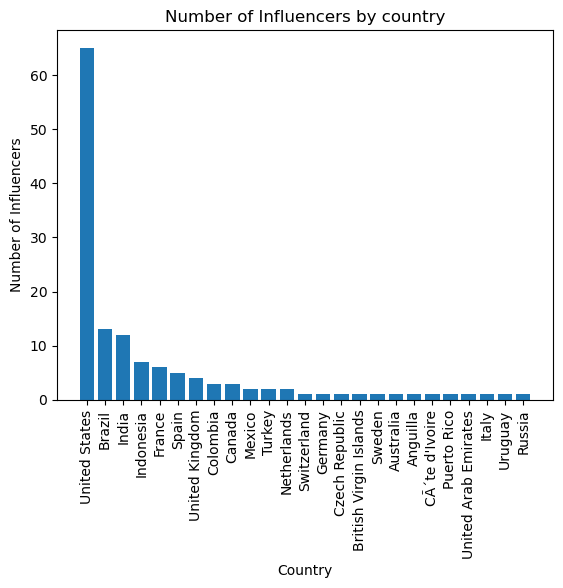

In [118]:
infl_cou =infl_df['Country Or Region'].value_counts()     
plt.bar(infl_cou.index,infl_cou.values)
plt.title('Number of Influencers by country')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.xticks(rotation =90)
plt.show()

# 4. Who are the top 10 influencers in the given dataset based on the following features ● Followers ● Average likes ● Total Likes

In [ ]:
Index of Top 10 influencers by followers count

In [122]:
infl_df['Followers'].nlargest(n=10).index         # Found the index of top influencers in different categories.

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
Index of Top 10 influencers by Average Likes

In [123]:
infl_df['Avg. Likes'].nlargest(n=10).index       # Found the index of top influencers in different categories.

Int64Index([96, 131, 165, 0, 32, 1, 2, 3, 38, 22], dtype='int64')

In [ ]:
Index of Top 10 influencers by Total Likes

In [124]:
infl_df['Total Likes'].nlargest(n=10).index     # Found the index of top influencers in different categories.

Int64Index([1, 0, 22, 6, 5, 25, 19, 9, 16, 4], dtype='int64')

# 5. Describe the relationship between the following pairs of features using a suitable graph ● Followers and Total Likes ● Followers and Influence Score ● Posts and Average likes ● Posts and Influence Score

Relationship Between Followers and Total Likes

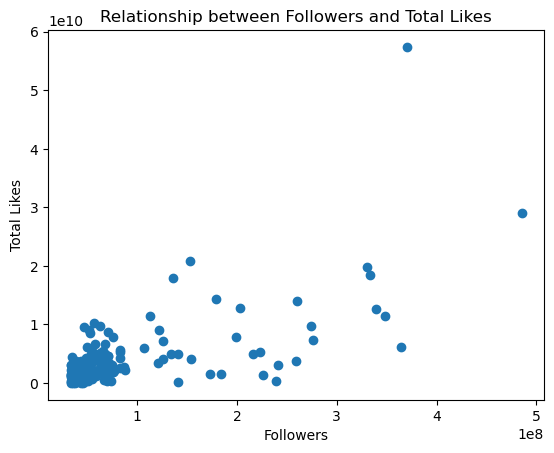

In [132]:
plt.scatter(infl_df['Followers'],infl_df['Total Likes'])           # Relationship between different columns using scatterplot.
plt.title('Relationship between Followers and Total Likes')
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.show()

Relationship Between Followers and Influence Score

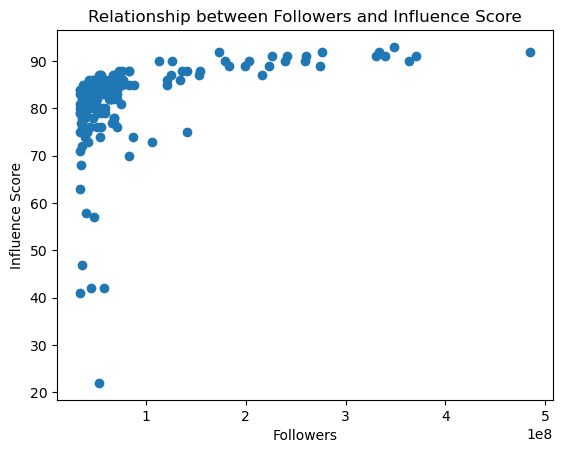

In [131]:
plt.scatter(infl_df['Followers'],infl_df['Influence Score'])
plt.title('Relationship between Followers and Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.show()

Relationship Between Posts and Average Likes

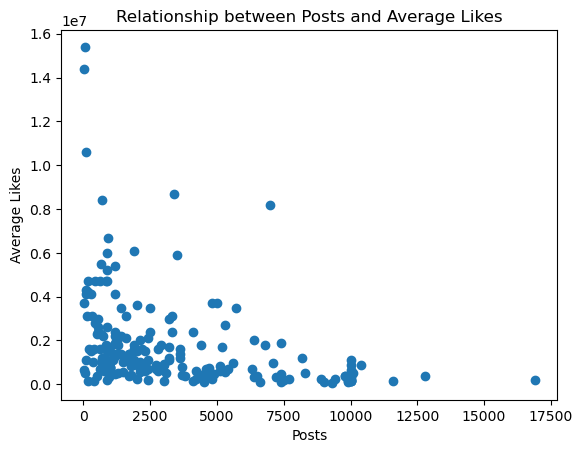

In [134]:
plt.scatter(infl_df['Posts'],infl_df['Avg. Likes'])
plt.title('Relationship between Posts and Average Likes')
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.show()

Relationship Between Posts and Influence Score

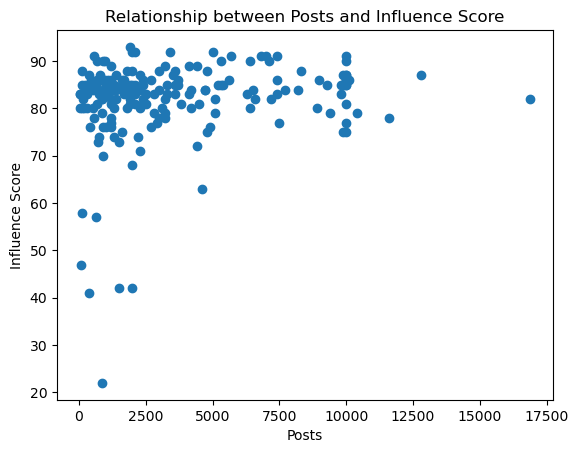

In [135]:
plt.scatter(infl_df['Posts'],infl_df['Influence Score'])
plt.title('Relationship between Posts and Influence Score')
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.show()